In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Set file path to csv and use file path to read CSV into a DataFrame and displaying a few rows
spy_csv = Path("CsvFiles/SPY.csv")
vgt_csv= Path("CsvFiles/VGT.csv")
# set file path to read CSV into a DataFrame
spy = pd.read_csv(spy_csv)
vgt = pd.read_csv(vgt_csv)

In [4]:
print(spy.head())
print(vgt.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2018-10-11  277.079987  278.899994  270.359985  272.170013  258.167450   
1  2018-10-12  276.769989  277.089996  272.369995  275.950012  261.752930   
2  2018-10-15  275.549988  277.040009  274.299988  274.399994  260.282654   
3  2018-10-16  276.600006  280.820007  276.070007  280.399994  265.973999   
4  2018-10-17  280.440002  281.149994  277.559998  280.450012  266.021454   

      Volume  
0  274840500  
1  183186500  
2  102263700  
3  118255800  
4  110626000  
         Date        Open        High         Low       Close   Adj Close  \
0  2018-10-11  185.429993  188.490005  182.259995  183.600006  177.754654   
1  2018-10-12  188.580002  189.850006  185.720001  189.259995  183.234406   
2  2018-10-15  188.809998  189.139999  186.259995  186.550003  180.610718   
3  2018-10-16  188.880005  192.940002  188.500000  192.350006  186.226074   
4  2018-10-17  192.830002  192.830002  190.000000  191.669998 

In [17]:
# Make a data frame containing VGT and XLF close price
close_df = pd.DataFrame()
close_df["Date"] = spy["Date"]
close_df["SPY"] = spy["Close"]
close_df["VGT"] = vgt["Close"]
close_df = close_df.set_index(pd.DatetimeIndex(close_df["Date"].values))
close_df.head()

,Date,SPY,VGT
2018-10-11,2018-10-11,272.170013,183.600006
2018-10-12,2018-10-12,275.950012,189.259995
2018-10-15,2018-10-15,274.399994,186.550003
2018-10-16,2018-10-16,280.399994,192.350006
2018-10-17,2018-10-17,280.450012,191.669998


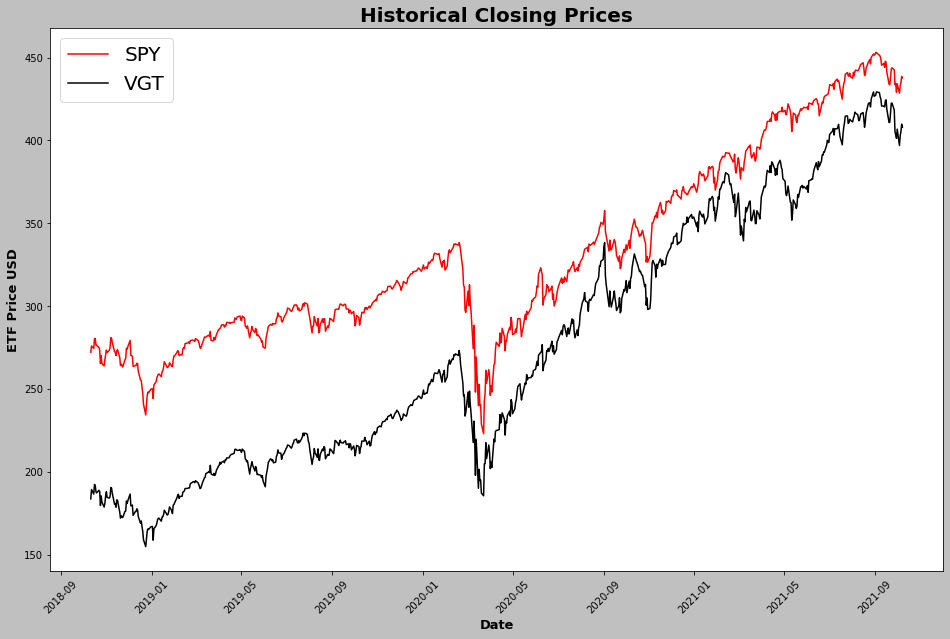

In [16]:
# Plot the data
plt.figure(figsize=(16,10),facecolor='silver')
plt.plot(close_df.index, close_df["SPY"], label="SPY", color="red")
plt.plot(close_df.index, close_df["VGT"], label="VGT",color="black")
plt.xlabel("Date",fontweight="bold",size=13)
plt.ylabel("ETF Price USD",fontweight="bold",size=13)
plt.legend(prop={"size":20})
plt.title("Historical Closing Prices",fontweight="bold",size=20)
plt.xticks(rotation=45)
plt.show()

In [38]:
# Plot the price difference between Spy and Vgt
price_diff_df = pd.DataFrame()
price_diff_df["Date"] = spy["Date"]
price_diff_df["SPY"] = spy["Close"]
price_diff_df["VGT"] = vgt["Close"]
price_diff_df["VGT-SPY Price Difference"] = vgt["Close"] - spy["Close"]
price_diff_df = price_diff_df.set_index(pd.DatetimeIndex(price_diff_df["Date"].values))
price_diff_df.head()

,Date,SPY,VGT,VGT-SPY Price Difference
2018-10-11,2018-10-11,272.170013,183.600006,-88.570007
2018-10-12,2018-10-12,275.950012,189.259995,-86.690017
2018-10-15,2018-10-15,274.399994,186.550003,-87.849991
2018-10-16,2018-10-16,280.399994,192.350006,-88.049988
2018-10-17,2018-10-17,280.450012,191.669998,-88.780014


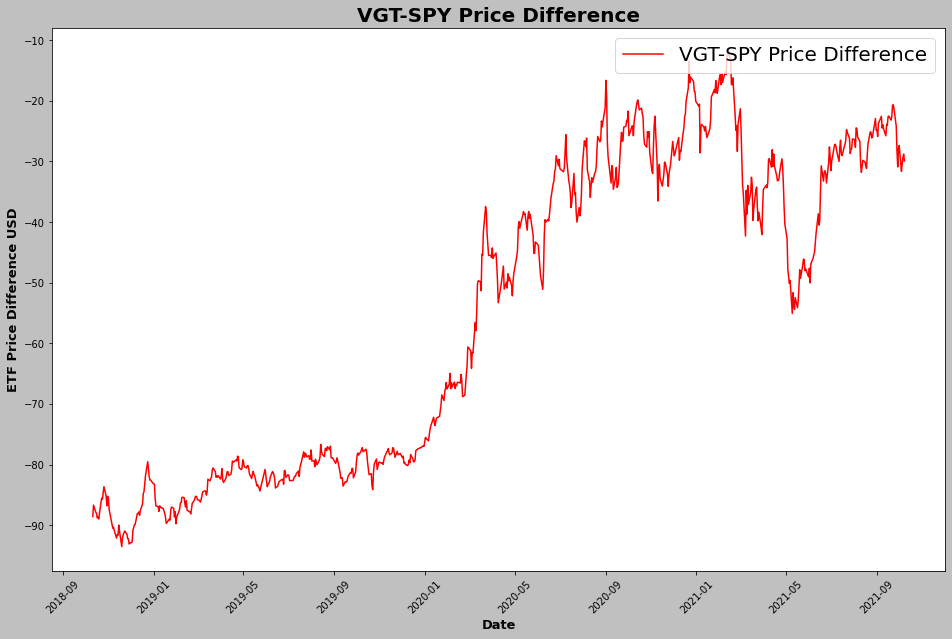

In [39]:
# Price Difference between Spy and Vgt. In 2018 there was a $90 difference in price. Around 2018 there was around a $90 price difference. In 2021 there is about a $30 difference.V
plt.figure(figsize=(16,10),facecolor='silver')
plt.plot(close_df.index, price_diff_df["VGT-SPY Price Difference"], label="VGT-SPY Price Difference", color="red")
plt.xlabel("Date",fontweight="bold",size=13)
plt.ylabel("ETF Price Difference USD",fontweight="bold",size=13)
plt.legend(loc="upper right",prop={"size":20})
plt.title("VGT-SPY Price Difference",fontweight="bold",size=20)
plt.xticks(rotation=45)
plt.show()

In [46]:
# Getting daily returns 
daily_returns = close_df[["VGT","SPY"]].pct_change(1)
daily_returns.tail()

,VGT,SPY
2021-10-04,-0.024259,-0.012896
2021-10-05,0.014434,0.010405
2021-10-06,0.006903,0.004156
2021-10-07,0.010752,0.008646
2021-10-08,-0.004709,-0.001824


<AxesSubplot:>

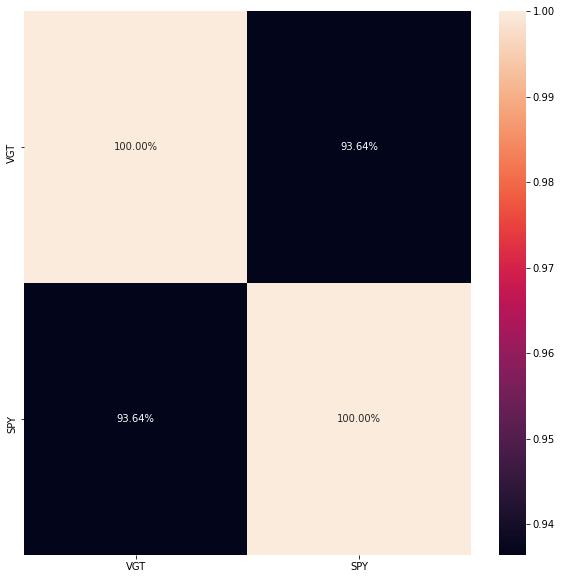

In [47]:
# Showing the correlation between both ETfs. Shows relationship between both etfs
plt.subplots(figsize=(10,10))
sns.heatmap(daily_returns.corr(), annot=True, fmt=".2%")
# SPY has a 93.64% correlation with VGT. Both ETFs seem to move similarly to each other. If one goes up the other one tends to follow. If one goes down the other one tends to follow.


In [48]:
# Showing the covariance. Covariance shows how stocks move together.
daily_returns.cov()

,VGT,SPY
VGT,0.000322,0.000240
SPY,0.000240,0.000204


In [49]:
# Get the varience
daily_returns.var()

VGT    0.000322
SPY    0.000204
dtype: float64

In [50]:
# Getting the volitility. Shows us how risky these ETFs are. Volitilty is variance squared. # SPY has lower volitility than VGT. These both have low volitility. VGT is more riskier. 
daily_returns.std()*100


VGT    1.794296
SPY    1.429346
dtype: float64

In [51]:
# Show the average daily returns. We can expect SPY to give us around a .07 percent return based on the passed. We can expect VGT to give us around a .12 percent return based on the passed. VGT is more volitile but gives the more of a return compared to SPY
daily_returns.mean()*100

VGT    0.122243
SPY    0.073441
dtype: float64

In [110]:
# Annualized returns. SPY will gives us about a 18% annual return. VGT will give us a 30% return. 
# VGT gives about 12% more return compared to SPY but it is more volitile.
daily_returns.mean()*100*252

SPY    18.507248
VGT    30.805137
dtype: float64